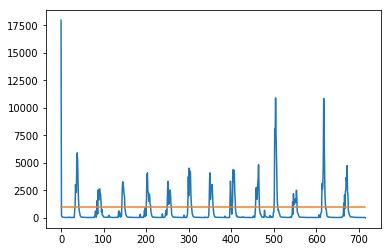

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np

left = []
lf = []

sampleRate = 44100.0
duration=20000.0
window=20.0

import wave
wr = wave.open("oui.wav")
par = list(wr.getparams())
ww = wave.open('out.wav', 'w')
ww.setparams(tuple(par))

avg_amplitude = []
amplitude = []

silence = 00
avg_amplitude_without_silence = []

# split by 20ms window
for i in range(int(duration/window)):
    da = np.frombuffer(wr.readframes(int(sampleRate/1000*window)), dtype=np.int16)
    left = da[0::2]
    right = da[1::2]
    if not len(left):
        continue
    lf = np.fft.rfft(left)
    rf = np.fft.rfft(right)
    lowpass = 21 # Remove lower frequencies.
    highpass = 2000 # Remove higher frequencies.
    lf[:lowpass] = 0 # low pass filter (1)
    lf[highpass:] = 0 # high pass filter (3)
    rf[:lowpass] = 0 # low pass filter (1)
    rf[highpass:] = 0 # high pass filter (3)
    avg = max(np.average(abs(lf)), np.average(abs(rf)))
    if avg > silence:
        avg_amplitude_without_silence.append(1000)
        nl = np.fft.irfft(lf)
        nr = np.fft.irfft(rf)
        ns = np.column_stack((nl,nr)).ravel().astype(np.int16)
        ww.writeframes(ns.tostring())   
       
    else:
        avg_amplitude_without_silence.append(-1000)
    avg_amplitude.append(avg)
    for l in left:
        amplitude.append(l)
        
    
wr.close()
ww.close()
plt.plot(avg_amplitude)
plt.plot(avg_amplitude_without_silence)